<a href="https://colab.research.google.com/github/syedajamema/heart_disease/blob/main/test_hd_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00

Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60


Naïve Bayes Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.95      0.83      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.

2025-03-28 07:13:59.487 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



Artificial Neural Network (ANN) Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60


Support Vector Machine (SVM) Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



2025-03-28 07:13:59.931 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-28 07:13:59.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 07:13:59.936 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 07:13:59.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 07:13:59.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 07:13:59.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 07:14:00.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 07:14:00.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

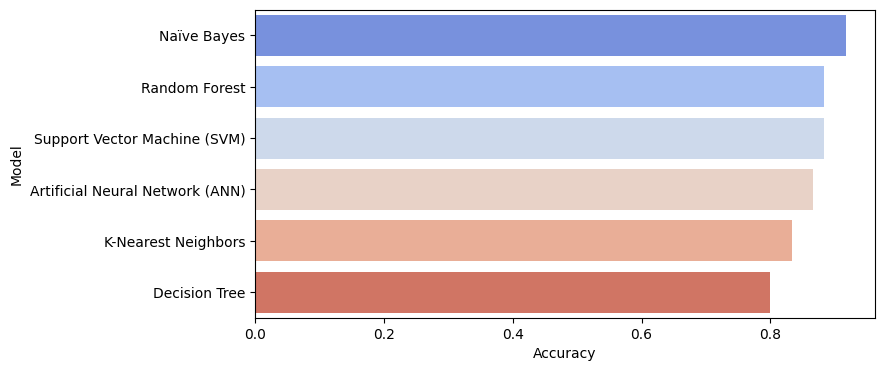

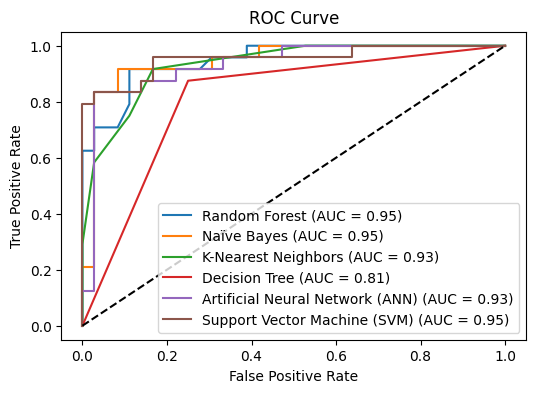

In [1]:
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(data_url, names=columns, na_values=["?", "NA"])

# Convert columns to numeric and handle missing values
df["ca"] = pd.to_numeric(df["ca"], errors='coerce')
df["thal"] = pd.to_numeric(df["thal"], errors='coerce')
df.dropna(inplace=True)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification

# Preprocessing
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Artificial Neural Network (ANN)": MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Streamlit UI
st.title("Heart Disease Prediction - Model Comparison")

# Show model comparison
st.write("### Model Performance")
st.dataframe(results_df)

# Accuracy Bar Chart
st.write("### Accuracy Comparison")
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=results_df["Accuracy"], y=results_df["Model"], palette="coolwarm", ax=ax)
st.pyplot(fig)

# ROC Curves
st.write("### ROC Curve Comparison")
fig, ax = plt.subplots(figsize=(6, 4))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")
ax.legend()
st.pyplot(fig)

# Predict with selected model
st.write("### Predict Heart Disease")
model_choice = st.selectbox("Select Model", list(models.keys()))
selected_model = models[model_choice]

# User Input
age = st.number_input("Age", min_value=20, max_value=100, value=50)
sex = st.selectbox("Sex", [0, 1], format_func=lambda x: "Male" if x == 1 else "Female")
cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure", min_value=80, max_value=200, value=120)
chol = st.number_input("Cholesterol", min_value=100, max_value=600, value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", [0, 1])
restecg = st.selectbox("Resting ECG", [0, 1, 2])
thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220, value=150)
exang = st.selectbox("Exercise Induced Angina", [0, 1])
oldpeak = st.number_input("ST Depression", min_value=0.0, max_value=6.2, value=1.0, step=0.1)
slope = st.selectbox("Slope of ST Segment", [0, 1, 2])
ca = st.number_input("Number of Major Vessels Colored", min_value=0, max_value=3, value=0, step=1)
thal = st.selectbox("Thalassemia", [1, 2, 3])

if st.button("Predict"):
    user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]], dtype=float)
    user_data_scaled = scaler.transform(user_data)
    prediction = selected_model.predict(user_data_scaled)[0]
    st.write("### Prediction:", "Heart Disease Detected!" if prediction == 1 else "No Heart Disease")
